- import the ibm_db Python library
- Enter the database connection credentials
- Create the database connection
- Close the database connection

In [ ]:
pip install wordcloud --trusted-host pypi.org --trusted-host files.pythonhosted.org ibm_db

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for ibm-db: filename=ibm_db-3.1.3-py3-none-any.whl size=29935893 sha256=f3abdcadb95b72656b43ad146ae5cafbda7e5abb4c2dd8654487a129ef999a0b
  Stored in directory: c:\users\suyashi144893\appdata\local\pip\cache\wheels\43\a0\e3\695f8fabac5b44c3469d01bbad1b0d0279dfc54cdcd4ba6cc9
Successfully built ibm-db
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import ibm_db
import ibm_db_dbi

ModuleNotFoundError: No module named 'ibm_db'

#### Now enter your database credentials below and execute the cell with Shift + Enter

In [ ]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "ngl06911"        # e.g. "abc12345"
dsn_pwd = "t9+gx60xzq31b0mt"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000"
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

### Create the DB2 database connection

- Ibm_db API uses the IBM Data Server Driver for ODBC and CLI APIs to connect to IBM DB2 and Informix.

- Lets build the dsn connection string using the credentials you entered above


dsn = "DRIVER={{IBM DB2 ODBC DRIVER}};" + \

      "DATABASE=SAMPLE;" + \

      "HOSTNAME=localhost;" + \

      "PORT=50000;" + \

      "PROTOCOL=TCPIP;" + \

      "UID=DB2INST1;" + \

      "PWD=db2inst1;"

In [ ]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=ngl06911;PWD=t9+gx60xzq31b0mt;


In [ ]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  ngl06911 on host:  dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net


In [ ]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


In [ ]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME)
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           libdb2.a
DRIVER_VER:            11.01.0405
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1208
CONN_CODEPAGE:         1208


### Close the Connection

We free all resources by closing the connection. Remember that it is always important to close connections so that we can avoid unused connections taking up resources.


In [ ]:
ibm_db.close(conn)

True

## Creating Tables and Queries

This Section illustrates how to access your database instance using Python by following the steps below:
- Import the ibm_db Python library
- Identify and enter the database connection credentials
- Create the database connection
- Create a table
- Insert data into the table
- Query data from the table
- Retrieve the result set into a pandas dataframe
- Close the database connection


In [ ]:
import ibm_db

In [ ]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "ngl06911"        # e.g. "abc12345"
dsn_pwd = "t9+gx60xzq31b0mt"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000"
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

In [ ]:
#Create database connection
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Connected to database:  BLUDB as user:  ngl06911 on host:  dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net


## Create a table in the database

In [ ]:
#Lets first drop the table INSTRUCTOR in case it exists from a previous attempt
dropQuery = "drop table INSTRUCTOR"

#Now execute the drop statment
dropStmt = ibm_db.exec_immediate(conn, dropQuery)

### Dont worry if you get this error:

If you see an exception/error similar to the following, indicating that INSTRUCTOR is an undefined name, that's okay. It just implies that the INSTRUCTOR table does not exist in the table - which would be the case if you had not created it previously.

Exception: [IBM][CLI Driver][DB2/LINUXX8664] SQL0204N "ABC12345.INSTRUCTOR" is an undefined name. SQLSTATE=42704 SQLCODE=-204


In [ ]:
#Construct the Create Table DDL statement - replace the ... with rest of the statement

createQuery = "create table INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2))"
#Now fill in the name of the method and execute the statement
createStmt = ibm_db.exec_immediate(conn,createQuery)



### Construct the query  with the insert statement


In [ ]:
insertQuery = "insert into INSTRUCTOR values (1, 'Rav', 'Ahuja', 'TORONTO', 'CA')"

insertStmt = ibm_db.exec_immediate(conn, insertQuery)


In [ ]:

insertQuery2 = "insert into INSTRUCTOR values (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US'),(4, 'Aisa', 'Vasu', 'Delhi', 'IN')"

insertStmt2 = ibm_db.exec_immediate(conn, insertQuery2)

###  Query data in the table

In [ ]:
### Construct the query that retrieves all rows from the Employees table
selectQuery = "select * from Employees"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

#Fetch the Dictionary (for the first row only)
ibm_db.fetch_both(selectStmt)


{'EMP_ID': 'E1001    ',
 0: 'E1001    ',
 'F_NAME': 'jio',
 1: 'jio',
 'L_NAME': 'JOY',
 2: 'JOY',
 'SSN': '123456   ',
 3: '123456   ',
 'B_DATE': datetime.date(1976, 1, 9),
 4: datetime.date(1976, 1, 9),
 'SEX': 'M',
 5: 'M',
 'ADDRESS': '5631 Rice, OakPark,IL',
 6: '5631 Rice, OakPark,IL',
 'JOB_ID': '100      ',
 7: '100      ',
 'SALARY': '100000.00',
 8: '100000.00',
 'MANAGER_ID': '30001    ',
 9: '30001    ',
 'DEP_ID': '2        ',
 10: '2        '}

In [ ]:
#Fetch the rest of the rows and print the ID and FNAME for those rows
while ibm_db.fetch_row(selectStmt) != False:
    print (" Emp_ID:",  ibm_db.result(selectStmt, 0), " F_NAME:",  ibm_db.result(selectStmt, "F_NAME"))

 Emp_ID: E1002      F_NAME: Alice
 Emp_ID: E1004      F_NAME: Santosh
 Emp_ID: E1005      F_NAME: Ahmed
 Emp_ID: E1006      F_NAME: Nancy
 Emp_ID: E1007      F_NAME: Mary
 Emp_ID: E1008      F_NAME: Bharath
 Emp_ID: E1009      F_NAME: Andrea
 Emp_ID: E1010      F_NAME: Ann


In [ ]:
## write and execute an update statement that changes the Rav's CITY to MOOSETOWN
updateQuery = "update INSTRUCTOR set CITY='MOOSETOWN' where FNAME='Rav'"
updateStmt = ibm_db.exec_immediate(conn, updateQuery)


### Task 7: Retrieve data into Pandas

In [ ]:
import pandas as pd
import ibm_db_dbi


In [ ]:
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

In [ ]:
#query statement to retrieve all rows in Employees table
selectQuery = "select * from Employees"

#retrieve the query results into a pandas dataframe
p_emp = pd.read_sql(selectQuery, pconn) ## Command to convert sql data into dataframe


In [ ]:
#print the entire data frame
p_emp

,EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
0,E1001,jio,JOY,123456,1976-01-09,M,"5631 Rice, OakPark,IL",100,100000.0,30001,2
1,E1002,Alice,James,123457,1972-07-31,F,"980 Berry ln, Elgin,IL",200,80000.0,30002,5
2,E1004,Santosh,Kumar,123459,1985-07-20,M,"511 Aurora Av, Aurora,IL",400,60000.0,30004,5
3,E1005,Ahmed,Hussain,123410,1981-01-04,M,"216 Oak Tree, Geneva,IL",500,70000.0,30001,2
4,E1006,Nancy,Allen,123411,1978-02-06,F,"111 Green Pl, Elgin,IL",600,90000.0,30001,2
5,E1007,Mary,Thomas,123412,1975-05-05,F,"100 Rose Pl, Gary,IL",650,65000.0,30003,7
6,E1008,Bharath,Gupta,123413,1985-05-06,M,"145 Berry Ln, Naperville,IL",660,65000.0,30003,7
7,E1009,Andrea,Jones,123414,1990-07-09,F,"120 Fall Creek, Gary,IL",234,70000.0,30003,7
8,E1010,Ann,Jacob,123415,1982-03-30,F,"111 Britany Springs,Elgin,IL",220,70000.0,30004,5


In [ ]:
p_emp.shape

(9, 11)

In [ ]:
p_emp.tail(2) #p_emp.head()

,EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
7,E1009,Andrea,Jones,123414,1990-07-09,F,"120 Fall Creek, Gary,IL",234,70000.0,30003,7
8,E1010,Ann,Jacob,123415,1982-03-30,F,"111 Britany Springs,Elgin,IL",220,70000.0,30004,5


In [ ]:
p_emp.describe()

,SALARY
count,9.000000
mean,74444.444444
std,13096.861371
min,60000.000000
25%,65000.000000
50%,70000.000000
75%,80000.000000
max,100000.000000


In [ ]:
p_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EMP_ID      9 non-null      object 
 1   F_NAME      9 non-null      object 
 2   L_NAME      9 non-null      object 
 3   SSN         9 non-null      object 
 4   B_DATE      9 non-null      object 
 5   SEX         9 non-null      object 
 6   ADDRESS     9 non-null      object 
 7   JOB_ID      9 non-null      object 
 8   SALARY      9 non-null      float64
 9   MANAGER_ID  9 non-null      object 
 10  DEP_ID      9 non-null      object 
dtypes: float64(1), object(10)
memory usage: 920.0+ bytes


<AxesSubplot:>

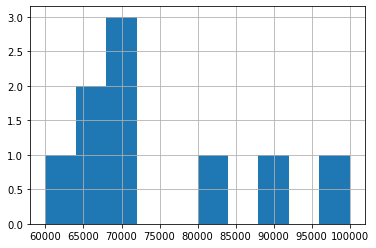

In [ ]:
p_emp['SALARY'].hist()

<AxesSubplot:xlabel='SEX'>

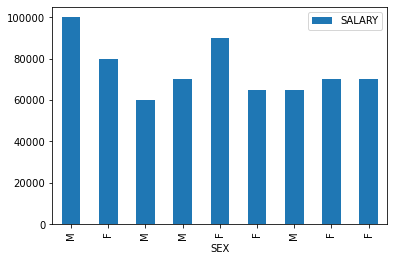

In [ ]:
p_emp.plot(kind="bar",x='SEX',y="SALARY")

In [ ]:
ibm_db.close(conn)

True